In [33]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
#Loading Dataset
Cdata = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CustomerChurn_dataset.csv')



# **Data Preprocessing**

EDA, Imputation and Encoding

In [35]:
Cdata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


No need missing values or need to drop columns



Encoding & Assignment


In [36]:
# Encode categorical variables
label_encoder = LabelEncoder()
binary_transform = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for column in binary_transform:
    Cdata[column] = label_encoder.fit_transform(Cdata[column])

In [37]:
# Encode categorical variables with more than two categories using One-Hot Encoding
cat_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies', 'Contract', 'PaymentMethod',]
Cdata = pd.get_dummies(Cdata, columns=cat_columns)

In [38]:
#Assignment
X = Cdata.drop('Churn', axis=1)  # Features
y = Cdata['Churn']  # Target variable

In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Convert 'TotalCharges' to numeric, handling errors by coercing to NaN
X_train['TotalCharges'] = pd.to_numeric(X_train['TotalCharges'], errors='coerce')
X_test['TotalCharges'] = pd.to_numeric(X_test['TotalCharges'], errors='coerce')

In [41]:
# Handle missing values (replace NaN values with 0, or use a more appropriate strategy)
X_train['TotalCharges'].fillna(0, inplace=True)
X_test['TotalCharges'].fillna(0, inplace=True)

In [22]:
#Normalize/Standardize Numerical Data
num_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = scaler.transform(X_test[num_columns])

In [42]:
Cdata.head() #see encoded difference

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,1,0,0,1,0,0,0,0,1,0


Feature Selection: EDA:Exploratory Data Analysis (EDA) involves exploring the dataset to identify patterns, trends, and relationship.

In [ ]:
#See Data
print(Cdata.describe())
print(Cdata.info())

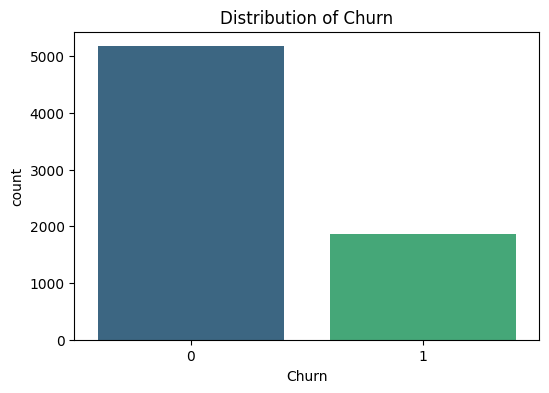

In [43]:
#I wanted to see the distribution of Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=Cdata, palette='viridis')
plt.title('Distribution of Churn')
plt.show()

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Assuming 'customerID' is not relevant for prediction
X_train_numeric = X_train.select_dtypes(exclude=['object'])
X_test_numeric = X_test.select_dtypes(exclude=['object'])

model = RandomForestClassifier()
model.fit(X_train_numeric, y_train)

feature_importances = model.feature_importances_

# Create pairs of feature names and importances
feature_importance_pairs = zip(X_train_numeric.columns, feature_importances)

# Sort pairs by importance in descending order
sorted_feature_importance = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Extract the top 10 sorted feature names
top_10_features = [feature[0] for feature in sorted_feature_importance[:10]]

# Print or use top_10_features as needed
print("Top 10 Relevant Features in Descending Order of Importance:")
print(top_10_features, '\n')


Top 10 Relevant Features in Descending Order of Importance:
['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract_Month-to-month', 'OnlineSecurity_No', 'PaymentMethod_Electronic check', 'gender', 'TechSupport_No', 'PaperlessBilling', 'Partner'] 



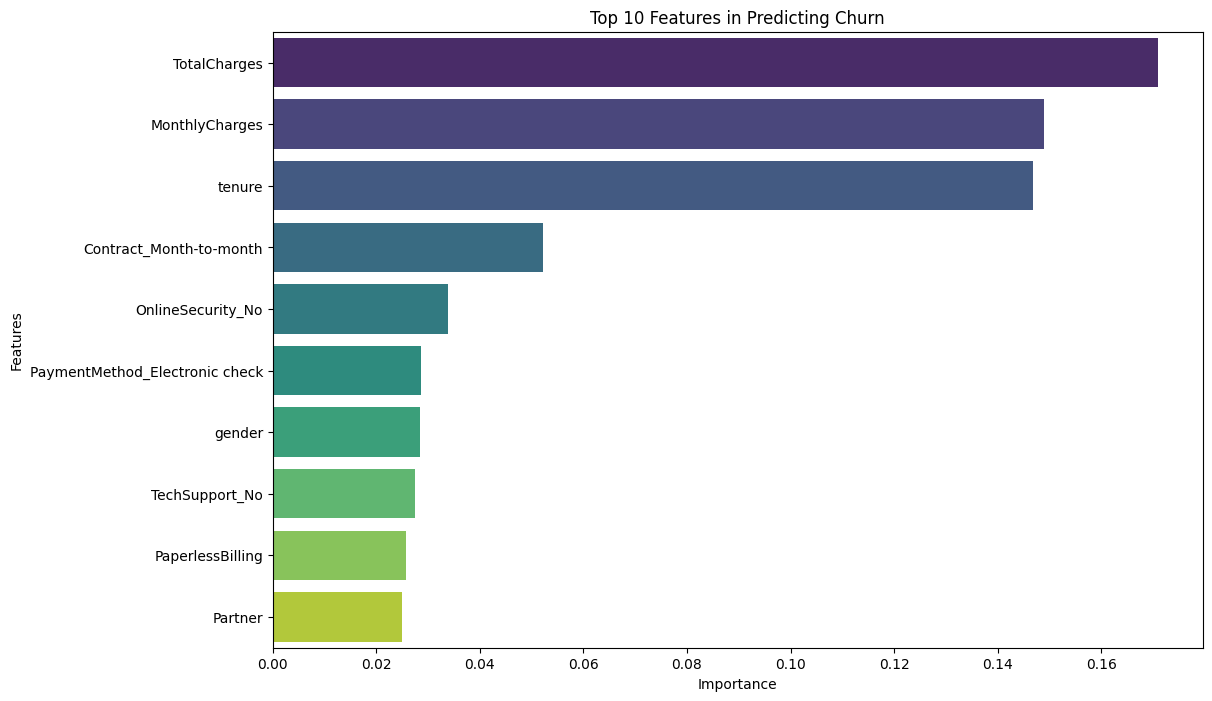

In [45]:

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': X_train_numeric.columns, 'Importance': model.feature_importances_})

# Filter for the top 10 features
top_10_features_df = feature_importance_df[feature_importance_df['Feature'].isin(top_10_features)]

# Sort the DataFrame by importance in descending order
top_10_features_df = top_10_features_df.sort_values(by='Importance', ascending=False)

# Plotting the top 10 features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_10_features_df, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Features in Predicting Churn')
plt.show()


Therefore, these are the top 10 features

# **Feature** **Subset**

# **Training**

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
Cdata_top = Cdata[top_10_features]
Cdata_top.head()

,TotalCharges,MonthlyCharges,tenure,Contract_Month-to-month,OnlineSecurity_No,PaymentMethod_Electronic check,gender,TechSupport_No,PaperlessBilling,Partner
0,29.85,29.85,1,1,1,1,0,1,1,1
1,1889.5,56.95,34,0,0,0,1,1,0,0
2,108.15,53.85,2,1,0,0,1,1,1,0
3,1840.75,42.30,45,0,0,0,1,0,0,0
4,151.65,70.70,2,1,1,1,0,1,1,0


In [48]:
Cdata_top['TotalCharges'] = pd.to_numeric(Cdata_top['TotalCharges'].replace('', pd.NA), errors='coerce').fillna(0)

<ipython-input-48-6d2bcd5b3d0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cdata_top['TotalCharges'] = pd.to_numeric(Cdata_top['TotalCharges'].replace('', pd.NA), errors='coerce').fillna(0)


In [49]:
Cdata_top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   TotalCharges                    7043 non-null   float64
 1   MonthlyCharges                  7043 non-null   float64
 2   tenure                          7043 non-null   int64  
 3   Contract_Month-to-month         7043 non-null   uint8  
 4   OnlineSecurity_No               7043 non-null   uint8  
 5   PaymentMethod_Electronic check  7043 non-null   uint8  
 6   gender                          7043 non-null   int64  
 7   TechSupport_No                  7043 non-null   uint8  
 8   PaperlessBilling                7043 non-null   int64  
 9   Partner                         7043 non-null   int64  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 357.8 KB


In [50]:
scaler = StandardScaler()
Cdata_scaled = scaler.fit_transform(Cdata_top)

#conver to df
Cdata_scaled_df = pd.DataFrame(Cdata_scaled, columns=Cdata_top.columns)

Cdata_scaled_df.head()

,TotalCharges,MonthlyCharges,tenure,Contract_Month-to-month,OnlineSecurity_No,PaymentMethod_Electronic check,gender,TechSupport_No,PaperlessBilling,Partner
0,-0.992611,-1.160323,-1.277445,0.904184,1.006696,1.406418,-1.009559,1.013869,0.829798,1.034530
1,-0.172165,-0.259629,0.066327,-1.105970,-0.993349,-0.711026,0.990532,1.013869,-1.205113,-0.966622
2,-0.958066,-0.362660,-1.236724,0.904184,-0.993349,-0.711026,0.990532,1.013869,0.829798,-0.966622
3,-0.193672,-0.746535,0.514251,-1.105970,-0.993349,-0.711026,0.990532,-0.986321,-1.205113,-0.966622
4,-0.938874,0.197365,-1.236724,0.904184,1.006696,1.406418,-1.009559,1.013869,0.829798,-0.966622


In [51]:
#Saving scaler to use in deployment
import pickle

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

Training an MLP using features from (1) with cross validation and GridSearchCV

In [52]:
X_train, X_test, y_train, y_test = train_test_split(Cdata_scaled_df,y, test_size=0.3, random_state=84)

In [53]:
# Define the MLP model using the MLPClassifier
mlp_model = MLPClassifier(max_iter=100)

In [55]:

mlp_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=100)

In [56]:
# Define the pipeline for preprocessing and model training
mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=100))
])

In [57]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'mlp__hidden_layer_sizes': [(64, 32), (32, 16)],
    'mlp__alpha': [0.0001, 0.001],  # Regularization parameter
}


In [59]:
# Perform cross-validated grid search
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(mlp_pipeline, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64, 32); total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64, 32); total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64, 32); total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64, 32); total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64, 32); total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(32, 16); total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(32, 16); total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(32, 16); total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(32, 16); total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(32, 16); total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .mlp__alpha=0.001, mlp__hidden_layer_sizes=(64, 32); total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .mlp__alpha=0.001, mlp__hidden_layer_sizes=(64, 32); total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .mlp__alpha=0.001, mlp__hidden_layer_sizes=(64, 32); total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .mlp__alpha=0.001, mlp__hidden_layer_sizes=(64, 32); total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .mlp__alpha=0.001, mlp__hidden_layer_sizes=(64, 32); total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .mlp__alpha=0.001, mlp__hidden_layer_sizes=(32, 16); total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .mlp__alpha=0.001, mlp__hidden_layer_sizes=(32, 16); total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .mlp__alpha=0.001, mlp__hidden_layer_sizes=(32, 16); total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .mlp__alpha=0.001, mlp__hidden_layer_sizes=(32, 16); total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .mlp__alpha=0.001, mlp__hidden_layer_sizes=(32, 16); total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp', MLPClassifier(max_iter=100))]),
             param_grid={'mlp__alpha': [0.0001, 0.001],
                         'mlp__hidden_layer_sizes': [(64, 32), (32, 16)]},
             scoring='accuracy', verbose=2)

In [60]:
# Get the best parameters from grid search and evaluate the model on the test set
best_params = grid_search.best_params_
best_mlp_model = grid_search.best_estimator_


In [61]:
from sklearn.metrics import roc_curve, confusion_matrix, classification_report

# Evaluate on the test set
y_pred_proba = best_mlp_model.predict_proba(X_test)[:, 1]
y_pred = best_mlp_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)


In [62]:
# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

In [63]:
# Print results
print("Test Accuracy:", test_accuracy)
print("AUC Score:", auc_score)
print("Best Parameters:", best_params)

Test Accuracy: 0.7884524372929484
AUC Score: 0.822989748819848
Best Parameters: {'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (32, 16)}


In [64]:
# Print confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[1398  148]
 [ 299  268]]


In [65]:
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1546
           1       0.64      0.47      0.55       567

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.78      0.79      0.78      2113



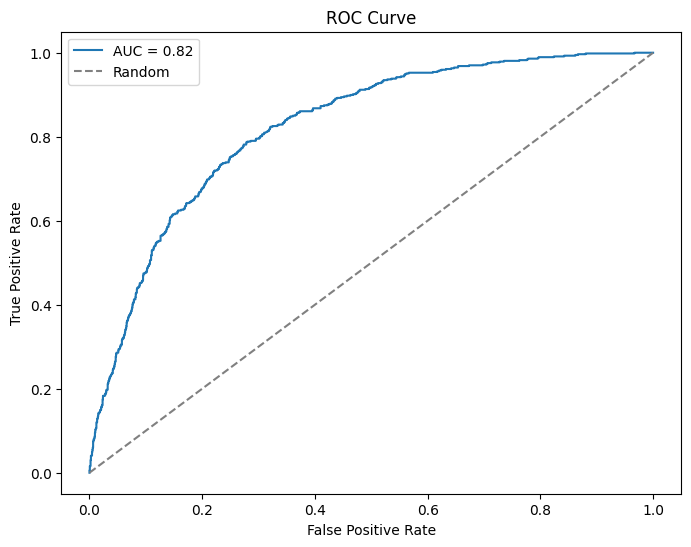

In [66]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [67]:
import pickle

# Save the best model to a file using pickle
model_filename = 'best_mlp_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_mlp_model, file)
